# AMLO Exploratory Data Analysis

In [1]:
import re
import os
import pandas as pd
from tqdm import tqdm

from sklearn.feature_extraction.text import TfidfVectorizer

from amlo_parser import AMLOParser
from training_set import TrainingSet

#### CONSTANTS

In [2]:
PATH = "C:/Users/fdmol/Desktop/AMLO-NLP/src/data/text_files/"
LABELED_PATH = "C:/Users/fdmol/Desktop/AMLO-NLP/src/data/amlo_labeling.xlsx"

### Pipeline

Create training set, along with its correspoding txt files

In [3]:
all_files = os.listdir(PATH)

training_set = TrainingSet(remove_stopwords=True)
training_set.create_training_set()

 53%|█████▎    | 657/1246 [00:00<00:00, 5821.74it/s]

Conference 20181207 is not agressive
Conference 20190102 is not agressive
Conference 20190111 is not agressive
Conference 20190227 is not agressive
Conference 20200128 is not agressive
Conference 20210510 is not agressive
Conference 20221125 is not agressive


100%|██████████| 1246/1246 [00:00<00:00, 6242.62it/s]


### Model training for scoring

In [4]:
from xgb_model import XGBoost

In [5]:
# Specify the path to your training data folder
folder_path = "C:/Users/fdmol/Desktop/AMLO-NLP/src/data/training_data/"

In [6]:
param = {
    "max_depth": 8,
    "eta": 0.15,
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
}


model = XGBoost(
    folder_path=folder_path,
    dialogues_path=training_set.DIALOGUES_PATH,
    xgb_params=param,
)
scores_df = model.complete_pipeline()

# Save the results to a CSV file
scores_df.to_csv(
    "C:/Users/fdmol/Desktop/AMLO-NLP/src/data/xgb_agressivity_scores.csv",
    index=False,
)

Mean Squared Error: 0.00045864265656497095
R^2 Score: 0.6367200061625237


Text(0.5, 1.0, 'Distribution of Aggressivity Scores')

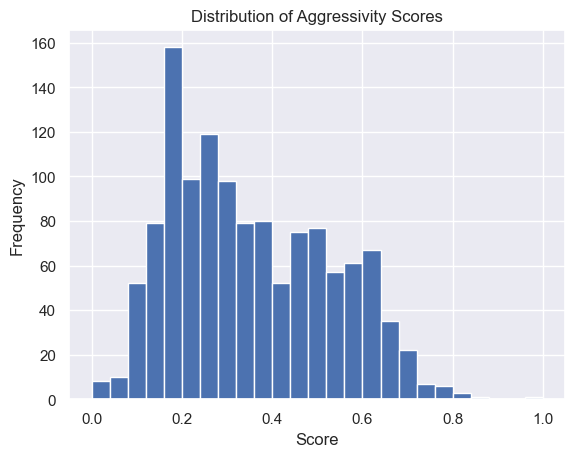

In [7]:
# Plot histogram of the scores

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.hist(scores_df["score"], bins=25)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Aggressivity Scores")